plot data
pull request 



https://data.wprdc.org/dataset/police-incident-blotter/resource/1797ead8-8262-41cc-9099-cbc8a161924b

In [4]:
import pandas as pd

df = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b")
df.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,3175521,324235775,23171535,27,2023-10-28T05:00:00,"7200 Block Monticello St Pittsburgh, PA 15208",N,Homewood North,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1302.0,9.0,2.0,-79.895444,40.459513
1,3175522,324798988,23176386,10,2023-11-06T10:30:00,"100 Block Ruth St Pittsburgh, PA 15211",Y,Mount Washington,3,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",1807.0,2.0,5.0,-80.005232,40.423791
2,3175523,324799806,23176355,0,2023-11-06T11:00:00,"7300 Block Hamilton Ave Pittsburgh, PA 15208",Y,Homewood South,5,99,4524 Windshield Obstructions and Wipers. / 627...,1303.0,9.0,2.0,-79.895648,40.454024
3,3175524,324806932,23176425,6,2023-11-05T22:30:00,"700 Block Penn Ave Pittsburgh, PA 15219",N,Central Business District,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,201.0,NaN,NaN,-79.884672,40.443511
4,3175525,324810215,23176417,99,2023-11-06T12:51:00,"7000 Block Kelly St Pittsburgh, PA 15208",N,Homewood South,5,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),1303.0,9.0,2.0,-79.901815,40.456612


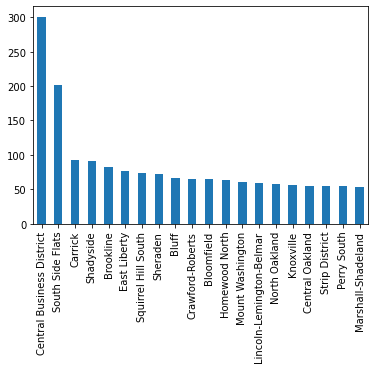

In [5]:
top_20 = df['INCIDENTNEIGHBORHOOD'].value_counts().head(20)

top_20.plot(kind = 'bar')